In [1]:
# Load pickled data
import pickle
import numpy as np
import tensorflow as tf
tf.python.control_flow_ops = tf
import csv
# import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

    
# Initial Setup for Keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout, Lambda, Cropping2D
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D



lines= []
# dataFolder = 'Track1Data1'
dataFolder = r'Track1Data6'
with open(dataFolder + '/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        lines.append(line)
        
images = []
measurements = []
for line in lines:
    source_path = line[0]
    filename = source_path.split('\\')[-1]
    current_path = dataFolder + '/IMG/' + filename
    image = mpimg.imread(current_path)
    images.append(image)
    measurements.append(line[3]) 
    

X_train = np.array(images)
y_train = np.array(measurements).astype('float')

X_train = np.concatenate((X_train, np.fliplr(X_train)), axis=0)
y_train = np.concatenate((y_train, -1.0*y_train), axis=0)

# model = Sequential()
# model.add(Flatten(input_shape=(160,320,3)))
# model.add(Dense(100)) #1000 would introduce 10~20GB of memory needed, which might overflow
# model.add(Dense(1))

# model.compile(loss='mse', optimizer='adam')
# model.fit(X_train, y_train, validation_split=0.2, shuffle=True, nb_epoch=7)

# model.save('modelA.h5')


# def my_resize_function(input):
#     new_height = 40
#     new_width = 160
#     from keras.backend import tf as ktf
#     return ktf.image.resize_images(input, (new_height, new_width))


# TODO: Build the Final Test Neural Network in Keras Here
model = Sequential()

model.add(Cropping2D(cropping=((60,20),(1,1)), input_shape=(160,320,3)))
# model.add(Lambda(lambda x: my_resize_function(x)))
model.add(Lambda(lambda x: (x / 255.0) - 0.5)) #output 80*320*3

model.add(Convolution2D(24, 5, 5)) #output 75*315*24
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2))) #output 35*157*24
model.add(Dropout(0.5))

model.add(Convolution2D(36, 5, 5)) #output 30*152*36
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2))) #output 15*76*36
# model.add(Dropout(0.5))

model.add(Convolution2D(48, 5, 5)) #output 10*71*48
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2))) #output 5*36*48

model.add(Convolution2D(64, 3, 3)) #output 2*33*64
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2))) #output 1*17*64
model.add(Dropout(0.5))

model.add(Flatten())  #output 1088
model.add(Dense(1000))
model.add(Activation('relu'))
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dense(50))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('relu'))
model.add(Dense(1))

model.compile(loss='mse', optimizer='adam')
model.fit(X_train, y_train, validation_split=0.2, shuffle=True, nb_epoch=3)

model.save('modelBData6+.h5')


    

Using TensorFlow backend.


Train on 34240 samples, validate on 8560 samples
Epoch 1/3
34240/34240 [==============================] - 201s - loss: 0.0037 - val_loss: 0.0064
Epoch 2/3
34240/34240 [==============================] - 189s - loss: 0.0025 - val_loss: 0.0049
Epoch 3/3
34240/34240 [==============================] - 189s - loss: 0.0023 - val_loss: 0.0057


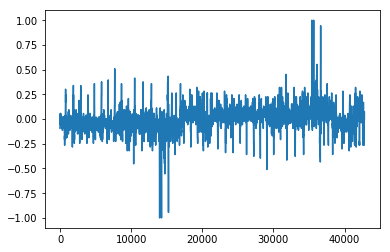

In [2]:
%matplotlib inline
plt.plot(y_train.astype('float'))